In [1]:
# ============================================
# TEMPERATURE SPEEDOMETER GAUGE
# ============================================
"""
Global temperature anomaly displayed as half-circle speedometer gauge.

COLOR ZONE SOURCES:
- 0-1.0°C: Relatively safe (experienced so far)
- 1.0-1.5°C: Caution zone (Paris Agreement preferred limit)
  Source: IPCC Special Report on 1.5°C (SR15, 2018)
  Source: Paris Agreement (2015)
- 1.5-2.0°C: Warning zone (Paris Agreement upper limit)
  Source: Paris Agreement "well below 2°C" goal
  Source: IPCC AR6 (2021)
- 2.0-3.0°C: Danger zone (severe climate impacts)
  Source: IPCC reports on climate impacts
  Source: WRI analysis of 1.5°C vs 2°C impacts

Current warming: ~1.2°C above pre-industrial (1850-1900 baseline)

References:
1. IPCC (2018). "Special Report on Global Warming of 1.5°C"
2. Paris Agreement (2015). UNFCCC
3. WRI (2023). "The 1.5 Degrees C Temperature Target: 8 Things to Know"
4. MIT Climate Portal: "Why did the IPCC choose 2°C?"
5. Copernicus Climate Change Service: Temperature monitoring data
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
from datetime import datetime

# Load temperature data
# Assuming you have temperature anomaly data loaded
# Replace with your actual temperature data file
temp_data = pd.read_csv('data/Land_and_Ocean_complete.txt',
                        comment='%', sep='\s+', header=None,
                        names=['year', 'month', 'anomaly_monthly', 'unc_monthly', 
                               'anomaly_annual', 'unc_annual', 'anomaly_5year', 'unc_5year', 
                               'anomaly_10year', 'unc_10year', 'anomaly_20year', 'unc_20year']
                        )

# Get current temperature anomaly
current_temp = temp_data['anomaly_monthly'].iloc[-1]
temp_data['date'] = pd.to_datetime(temp_data[['year', 'month']].assign(day=1))
current_date = temp_data['date'].iloc[-1] if 'date' in temp_data.columns else datetime.now().strftime('%Y-%m')

print(f"Current temperature anomaly: +{current_temp:.2f}°C")
print(f"Data as of: {current_date}")

<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
C:\Users\linas\AppData\Local\Temp\ipykernel_42212\3850423065.py:39: SyntaxWarning: invalid escape sequence '\s'
  comment='%', sep='\s+', header=None,


Current temperature anomaly: +1.14°C
Data as of: 2024-12-01 00:00:00


In [2]:
#from pathlib import Path
import matplotlib as mpl
#from matplotlib import font_manager
#fpath = Path("C:\Dokumente\FH Kiel\Data Visualization\Project\alarm clock.ttf")
#font_manager.fontManager.addfont(str(fpath))
#prop = font_manager.FontProperties(fname=str(fpath))

mpl.rcParams['font.family'] = ['LCD']

mpl.get_cachedir()

'C:\\Users\\linas\\.matplotlib'

In [3]:
colors = {'green': '#2dc937',
          'light_green': '#99c140',
          'yellow': '#e7b416',
          'orange': '#db7b2b',
          'red': '#cc3232'
          }

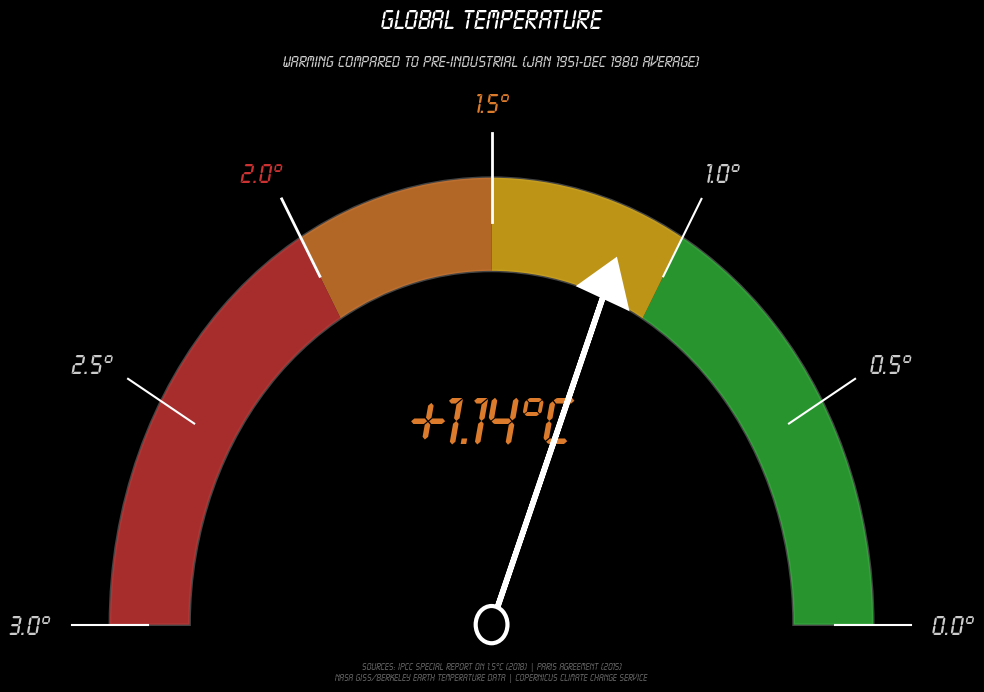

In [9]:
# ============================================
# CREATE SPEEDOMETER VISUALIZATION
# ============================================

fig, ax = plt.subplots(figsize=(10, 7), facecolor='#000000')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.1, 1.4)
ax.axis('off')
ax.set_facecolor('#000000')

# Speedometer spans 180 degrees (half circle)
theta_start = 0    # Right side
theta_end = 180    # Left side

# Temperature range: 0°C to 3.0°C
temp_min = 0.0
temp_max = 3.0
temp_range = temp_max - temp_min

# Calculate angles for temperature thresholds
def temp_to_angle(temp_value):
    """Convert temperature to angle on gauge"""
    pct = (temp_value - temp_min) / temp_range
    return theta_start + pct * (theta_end - theta_start)

angle_1_0 = temp_to_angle(1.0)  # Experienced warming
angle_1_5 = temp_to_angle(1.5)  # Paris Agreement preferred target
angle_2_0 = temp_to_angle(2.0)  # Paris Agreement upper limit

# Background arc
bg_arc = Wedge((0, 0), 1.2, theta_start, theta_end, width=0.25,
               facecolor='#1a1a1a', edgecolor='#444444', linewidth=2)
ax.add_patch(bg_arc)

# Green zone: 0-1.0°C (Relatively safe)
safe_arc = Wedge((0, 0), 1.2, theta_start, angle_1_0, width=0.25,
                 facecolor=colors['green'], edgecolor='none', alpha=0.7)
ax.add_patch(safe_arc)

# Yellow zone: 1.0-1.5°C (CAUTION - Paris preferred target)
caution_arc = Wedge((0, 0), 1.2, angle_1_0, angle_1_5, width=0.25,
                    facecolor=colors['yellow'], edgecolor='none', alpha=0.8)
ax.add_patch(caution_arc)

# Orange zone: 1.5-2.0°C (WARNING - Paris upper limit)
warning_arc = Wedge((0, 0), 1.2, angle_1_5, angle_2_0, width=0.25,
                    facecolor=colors['orange'], edgecolor='none', alpha=0.8)
ax.add_patch(warning_arc)

# Red zone: 2.0-3.0°C (DANGER - severe impacts)
danger_arc = Wedge((0, 0), 1.2, angle_2_0, theta_end, width=0.25,
                   facecolor=colors['red'], edgecolor='none', alpha=0.8)
ax.add_patch(danger_arc)

# Add tick marks and labels
tick_values = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
for temp_val in tick_values:
    angle = temp_to_angle(temp_val)
    angle_rad = np.radians(angle)
    
    # Tick mark
    x_outer = 1.32 * np.cos(angle_rad)
    y_outer = 1.32 * np.sin(angle_rad)
    x_inner = 1.08 * np.cos(angle_rad)
    y_inner = 1.08 * np.sin(angle_rad)
    ax.plot([x_inner, x_outer], [y_inner, y_outer], 
            color='white', linewidth=2 if temp_val in [1.5, 2.0] else 1.5)
    
    # Label
    x_label = 1.45 * np.cos(angle_rad)
    y_label = 1.4 * np.sin(angle_rad)
    
    label_text = f'{temp_val:.1f}°'
    if temp_val == 1.5:
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=20, 
                color=colors['orange'], fontweight='bold')
    elif temp_val == 2.0:
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=20, 
                color=colors['red'], fontweight='bold')
    else:
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=20, 
                color='#cccccc')

# Digital readout - current temperature
ax.text(0, 0.55, f'+{current_temp:.2f}°C', fontsize=50, fontweight='bold',
        color=colors['orange'], ha='center', va='center', 
        zorder=1)

# Needle pointing to current temperature
needle_angle = temp_to_angle(current_temp)
needle_rad = np.radians(needle_angle)
needle_x = 0.95 * np.cos(needle_rad)
needle_y = 0.95 * np.sin(needle_rad)

ax.arrow(0, 0, needle_x, needle_y, head_width=0.15, head_length=0.1,
         fc='#ffffff', ec='#ffffff', linewidth=4, zorder=2)

# Center hub
center = Circle((0, 0), 0.05, facecolor='#000000', 
                edgecolor='white', linewidth=3, zorder=11)
ax.add_patch(center)



# Title
ax.text(0, 1.6, 'GLOBAL TEMPERATURE', fontsize=20,
        fontweight='bold', color='#ffffff', ha='center', va='bottom')
ax.text(0, 1.5, 'Warming compared to pre-industrial (Jan 1951-Dec 1980 average)', fontsize=12,
        color='#cccccc', ha='center', va='bottom', style='italic')

# Sources
sources_text = '''Sources: IPCC Special Report on 1.5°C (2018) | Paris Agreement (2015)
NASA GISS/Berkeley Earth Temperature Data | Copernicus Climate Change Service'''
ax.text(0, -0.1, sources_text, fontsize=7, color='#666666',
        ha='center', va='top', multialignment='center')

plt.tight_layout()
#plt.savefig('visualizations/temperature_speedometer.png', dpi=300,
#            bbox_inches='tight', facecolor='#000000', edgecolor='none')
plt.show()

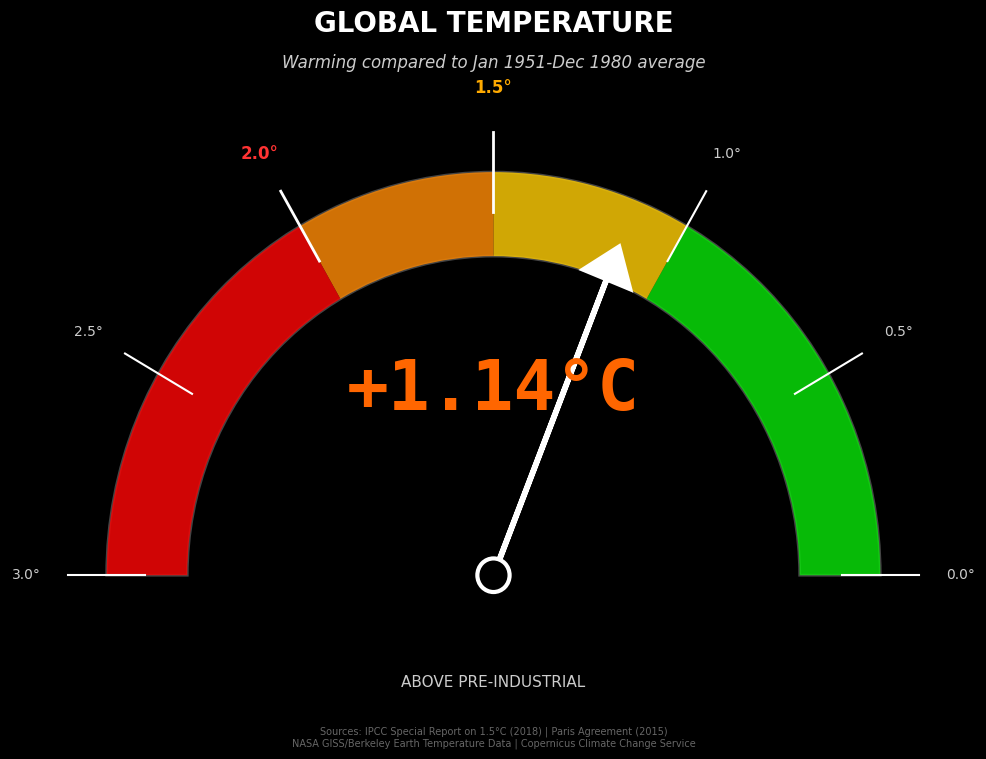

In [67]:
# ============================================
# CREATE SPEEDOMETER VISUALIZATION
# ============================================

fig, ax = plt.subplots(figsize=(10, 8), facecolor='#000000')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.15, 1.4)
ax.axis('off')
ax.set_facecolor('#000000')

# Speedometer spans 180 degrees (half circle)
theta_start = 0    # Right side
theta_end = 180    # Left side

# Temperature range: 0°C to 3.0°C
temp_min = 0.0
temp_max = 3.0
temp_range = temp_max - temp_min

# Calculate angles for temperature thresholds
def temp_to_angle(temp_value):
    """Convert temperature to angle on gauge"""
    pct = (temp_value - temp_min) / temp_range
    return theta_start + pct * (theta_end - theta_start)

angle_1_0 = temp_to_angle(1.0)  # Experienced warming
angle_1_5 = temp_to_angle(1.5)  # Paris Agreement preferred target
angle_2_0 = temp_to_angle(2.0)  # Paris Agreement upper limit

# Background arc
bg_arc = Wedge((0, 0), 1.2, theta_start, theta_end, width=0.25,
               facecolor='#1a1a1a', edgecolor='#444444', linewidth=2)
ax.add_patch(bg_arc)

# Green zone: 0-1.0°C (Relatively safe)
safe_arc = Wedge((0, 0), 1.2, theta_start, angle_1_0, width=0.25,
                 facecolor='#00ff00', edgecolor='none', alpha=0.7)
ax.add_patch(safe_arc)

# Yellow zone: 1.0-1.5°C (CAUTION - Paris preferred target)
caution_arc = Wedge((0, 0), 1.2, angle_1_0, angle_1_5, width=0.25,
                    facecolor='#ffcc00', edgecolor='none', alpha=0.8)
ax.add_patch(caution_arc)

# Orange zone: 1.5-2.0°C (WARNING - Paris upper limit)
warning_arc = Wedge((0, 0), 1.2, angle_1_5, angle_2_0, width=0.25,
                    facecolor='#ff8800', edgecolor='none', alpha=0.8)
ax.add_patch(warning_arc)

# Red zone: 2.0-3.0°C (DANGER - severe impacts)
danger_arc = Wedge((0, 0), 1.2, angle_2_0, theta_end, width=0.25,
                   facecolor='#ff0000', edgecolor='none', alpha=0.8)
ax.add_patch(danger_arc)

# Add tick marks and labels
tick_values = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
for temp_val in tick_values:
    angle = temp_to_angle(temp_val)
    angle_rad = np.radians(angle)
    
    # Tick mark
    x_outer = 1.32 * np.cos(angle_rad)
    y_outer = 1.32 * np.sin(angle_rad)
    x_inner = 1.08 * np.cos(angle_rad)
    y_inner = 1.08 * np.sin(angle_rad)
    ax.plot([x_inner, x_outer], [y_inner, y_outer], 
            color='white', linewidth=2 if temp_val in [1.5, 2.0] else 1.5)
    
    # Label
    x_label = 1.45 * np.cos(angle_rad)
    y_label = 1.45 * np.sin(angle_rad)
    
    label_text = f'{temp_val:.1f}°'
    if temp_val == 1.5:
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=12, 
                color='#ffaa00', fontweight='bold')
    elif temp_val == 2.0:
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=12, 
                color='#ff3333', fontweight='bold')
    else:
        ax.text(x_label, y_label, label_text, 
                ha='center', va='center', fontsize=10, 
                color='#cccccc')

# Needle pointing to current temperature
needle_angle = temp_to_angle(current_temp)
needle_rad = np.radians(needle_angle)
needle_x = 0.95 * np.cos(needle_rad)
needle_y = 0.95 * np.sin(needle_rad)

ax.arrow(0, 0, needle_x, needle_y, head_width=0.15, head_length=0.1,
         fc='#ffffff', ec='#ffffff', linewidth=4, zorder=10)

# Center hub
center = Circle((0, 0), 0.05, facecolor='#000000', 
                edgecolor='white', linewidth=3, zorder=11)
ax.add_patch(center)

# Digital readout - current temperature
ax.text(0, 0.55, f'+{current_temp:.2f}°C', fontsize=50, fontweight='bold',
        color='#ff6600', ha='center', va='center', 
        family='monospace', zorder=12)
ax.text(0, -0.32, 'ABOVE PRE-INDUSTRIAL', fontsize=11, color='#cccccc',
        ha='center', va='center')

# Title
ax.text(0, 1.6, 'GLOBAL TEMPERATURE', fontsize=20,
        fontweight='bold', color='#ffffff', ha='center', va='bottom')
ax.text(0, 1.5, 'Warming compared to Jan 1951-Dec 1980 average', fontsize=12,
        color='#cccccc', ha='center', va='bottom', style='italic')

# Target markers with labels
# 1.5°C target line
#target_1_5_rad = np.radians(angle_1_5)
#x_1_5 = 1.0 * np.cos(target_1_5_rad)
#y_1_5 = 1.0 * np.sin(target_1_5_rad)
#ax.plot([0, x_1_5], [0, y_1_5], color='#ffaa00', 
#        linewidth=2, linestyle='--', alpha=0.5, zorder=5)
#ax.text(x_1_5 * 0.7, y_1_5 * 0.7 + 0.1, '1.5°C\nTARGET', 
#        fontsize=9, color='#ffaa00', ha='center', va='center',
#        fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', 
#                                     facecolor='#000000', alpha=0.7))

# 2.0°C limit line
#limit_2_0_rad = np.radians(angle_2_0)
#x_2_0 = 1.0 * np.cos(limit_2_0_rad)
#y_2_0 = 1.0 * np.sin(limit_2_0_rad)
#ax.plot([0, x_2_0], [0, y_2_0], color='#ff3333', 
#        linewidth=2, linestyle='--', alpha=0.5, zorder=5)
#ax.text(x_2_0 * 0.7, y_2_0 * 0.7 - 0.1, '2.0°C\nLIMIT', 
#        fontsize=9, color='#ff3333', ha='center', va='center',
#        fontweight='bold', bbox=dict(boxstyle='round,pad=0.3', 
#                                     facecolor='#000000', alpha=0.7))

# Status indicator
remaining_to_1_5 = 1.5 - current_temp
remaining_to_2_0 = 2.0 - current_temp

if current_temp >= 2.0:
    status_text = '☠ CRITICAL: ABOVE 2°C LIMIT ☠'
    status_color = '#ff0000'
elif current_temp >= 1.5:
    status_text = f'⚠ WARNING: {remaining_to_2_0:.2f}°C TO LIMIT ⚠'
    status_color = '#ff8800'
else:
    status_text = f'⚠ CAUTION: {remaining_to_1_5:.2f}°C TO TARGET ⚠'
    status_color = '#ffaa00'

#ax.text(0, 0.85, status_text, fontsize=12, fontweight='bold',
#        color=status_color, ha='center', va='center',
#        bbox=dict(boxstyle='round,pad=0.5', facecolor=status_color,
#                 alpha=0.2, edgecolor=status_color, linewidth=2))

# Zone descriptions at bottom
#zone_y = -0.55
#ax.text(0.9, zone_y, 'SAFE', fontsize=9, color='#00ff00',
#        ha='center', fontweight='bold')
#ax.text(0.45, zone_y, 'CAUTION', fontsize=9, color='#ffcc00',
#        ha='center', fontweight='bold')
#ax.text(-0.15, zone_y, 'WARNING', fontsize=9, color='#ff8800',
#        ha='center', fontweight='bold')
#ax.text(-0.75, zone_y, 'DANGER', fontsize=9, color='#ff3333',
#        ha='center', fontweight='bold')

# Sources
sources_text = '''Sources: IPCC Special Report on 1.5°C (2018) | Paris Agreement (2015)
NASA GISS/Berkeley Earth Temperature Data | Copernicus Climate Change Service'''
ax.text(0, -0.45, sources_text, fontsize=7, color='#666666',
        ha='center', va='top', multialignment='center')

plt.tight_layout()
#plt.savefig('visualizations/temperature_speedometer.png', dpi=300,
#            bbox_inches='tight', facecolor='#000000', edgecolor='none')
plt.show()